In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [7]:
# Name: Aapeli Sauli Aleksi Joronen
# Project title: Effects of political and economic affairs on political polarization
# QPA2, Political Science Major

In [8]:
# RQ: Do reduced public trust in the national legislature and the legal system,
# a lower satisfaction in the economy as well as a higher perception of
# corruption lead to increasing political polarization?

In [9]:
# H0: The independent variables do not show statistically significant correlation in the dependent variable
# H1: Trust in national parliament, the legal system and economic satisfaction have a negative relationship
# with the dependent variable, alongside the perception of corruption having a positive one
# H2: Same, without the economic satisfaction (==> Greece on the Political Polarization Index)

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/AapeliJ/QPA_2_regression_project/refs/heads/main/cleaned_dataset%20(1).csv')

In [11]:
print(df["Entity"].unique())

['Austria' 'Belgium' 'Bulgaria' 'Cyprus' 'Germany' 'Spain' 'Finland'
 'France' 'Greece' 'Croatia' 'Hungary' 'Ireland' 'Italy' 'Lithuania'
 'Latvia' 'Netherlands' 'Poland' 'Portugal' 'Sweden' 'Slovenia' 'Slovakia']


In [12]:
df.head()

,name,cntry,trstprl,trstlgl,stfeco,Entity,CPI,PPS
0,ESS11e03,AT,6.0,9.0,6.0,Austria,67.0,-0.233
1,ESS11e03,AT,6.0,6.0,2.0,Austria,67.0,-0.233
2,ESS11e03,AT,7.0,5.0,6.0,Austria,67.0,-0.233
3,ESS11e03,AT,5.0,6.0,4.0,Austria,67.0,-0.233
4,ESS11e03,AT,6.0,8.0,6.0,Austria,67.0,-0.233


In [13]:
# Defining the variables for easier access
y = df["PPS"] # Political Polarization Index = PPS
x = df[["trstprl", "trstlgl", "stfeco", "CPI"]]
# In order, trust in parliament, trust in legislature, economic satisfaction, corruption perception

In [14]:
# let's do baseline and interaction, i just think both are fun :3

x = sm.add_constant(x)
model_base = sm.OLS(y, x).fit()

print(model_base.summary())

                            OLS Regression Results                            
Dep. Variable:                    PPS   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     919.8
Date:                Wed, 12 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:50:10   Log-Likelihood:                -16578.
No. Observations:               10334   AIC:                         3.317e+04
Df Residuals:                   10329   BIC:                         3.320e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6160      0.060     59.956      0.0

In [15]:
df["trustlegXecosat"] = df["trstprl"] * df["stfeco"]

X_int = df[["trstprl", "trstlgl", "stfeco", "CPI", "trustlegXecosat"]]
X_int = sm.add_constant(X_int)

model_int = sm.OLS(y, X_int).fit()

print(model_int.summary())

                            OLS Regression Results                            
Dep. Variable:                    PPS   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     735.8
Date:                Wed, 12 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:50:10   Log-Likelihood:                -16578.
No. Observations:               10334   AIC:                         3.317e+04
Df Residuals:                   10328   BIC:                         3.321e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.6171      0.061     

In [16]:
# no moderation between trust in legislature and economic satisfaction, CPI seems to be the highest predicator
# curious to see how eg) CPI and trust in parliament would go

In [17]:
# y = df["PPS"] # Political Polarization Index = PPS
# x = df[["trstprl", "trstlgl", "stfeco", "CPI"]]

df["trustprlXcpi"] = df["trstprl"] * df["CPI"]

X_int1 = df[["trstprl", "trstlgl", "stfeco", "CPI", "trustprlXcpi"]]
X_int1 = sm.add_constant(X_int1)

model_int1 = sm.OLS(y, X_int1).fit()

print(model_int.summary())

                            OLS Regression Results                            
Dep. Variable:                    PPS   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     735.8
Date:                Wed, 12 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:50:10   Log-Likelihood:                -16578.
No. Observations:               10334   AIC:                         3.317e+04
Df Residuals:                   10328   BIC:                         3.321e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.6171      0.061     

In [26]:
comparison = pd.DataFrame({
    "Model": ["Baseline", "Interaction", "Interaction 1"],
    "R-squared": [model_base.rsquared, model_int.rsquared, model_int1.rsquared], # model_base, model_int, model_int1
    "Adj. R-squared": [model_base.rsquared_adj, model_int.rsquared_adj, model_int1.rsquared_adj],
    "AIC": [model_base.aic, model_int.aic, model_int1.aic],
    "BIC": [model_base.bic, model_int.bic, model_int1.bic]
})

print(comparison)

           Model  R-squared  Adj. R-squared           AIC           BIC
0       Baseline   0.262645        0.262360  33165.624813  33201.840786
1    Interaction   0.262648        0.262291  33167.589219  33211.048388
2  Interaction 1   0.263256        0.262899  33159.057819  33202.516987
   df_resid           ssr  df_diff    ss_diff         F    Pr(>F)
0   10329.0  14968.742935      0.0        NaN       NaN       NaN
1   10328.0  14968.691378      1.0   0.051557  0.035602  0.850343
2   10328.0  14956.338834     -0.0  12.352545      -inf       NaN


In [27]:
from statsmodels.stats.anova import anova_lm
print(anova_lm(model_base, model_int, model_int1))

   df_resid           ssr  df_diff    ss_diff         F    Pr(>F)
0   10329.0  14968.742935      0.0        NaN       NaN       NaN
1   10328.0  14968.691378      1.0   0.051557  0.035602  0.850343
2   10328.0  14956.338834     -0.0  12.352545      -inf       NaN


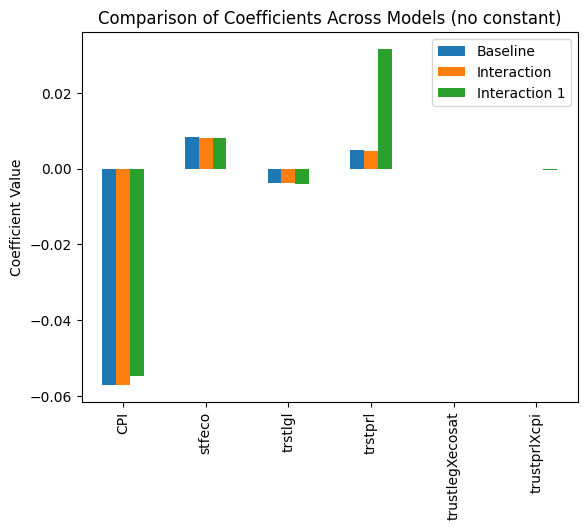

In [19]:
# model_base, model_int, model_int1

coef_df = pd.DataFrame({
    "Baseline": model_base.params.drop("const"),
    "Interaction": model_int.params.drop("const"),
    "Interaction 1": model_int1.params.drop("const")
})

coef_df.plot(kind="bar")
plt.title("Comparison of Coefficients Across Models (no constant)")
plt.ylabel("Coefficient Value")
plt.show()

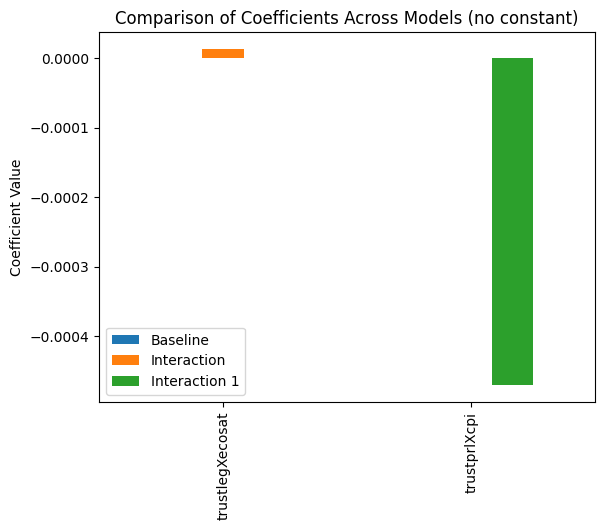

In [22]:
coef_df = pd.DataFrame({
    "Baseline": model_base.params.drop(["const", "CPI", "stfeco", "trstlgl", "trstprl"]),
    "Interaction": model_int.params.drop(["const", "CPI", "stfeco", "trstlgl", "trstprl"]),
    "Interaction 1": model_int1.params.drop(["const", "CPI", "stfeco", "trstlgl", "trstprl"])
})

coef_df.plot(kind="bar")
plt.title("Comparison of Coefficients Across Models (no constant)")
plt.ylabel("Coefficient Value")
plt.show()

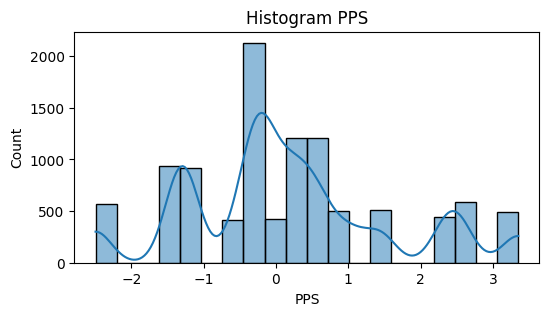

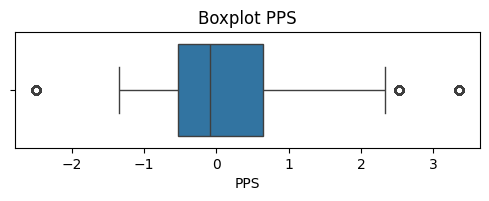

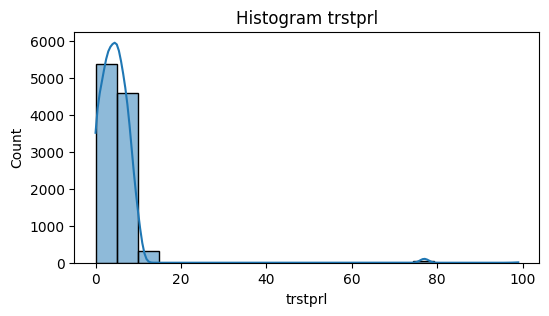

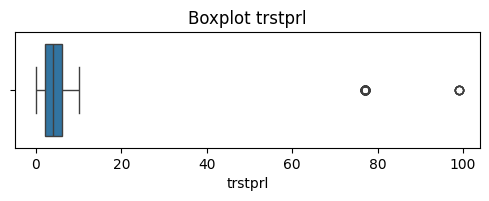

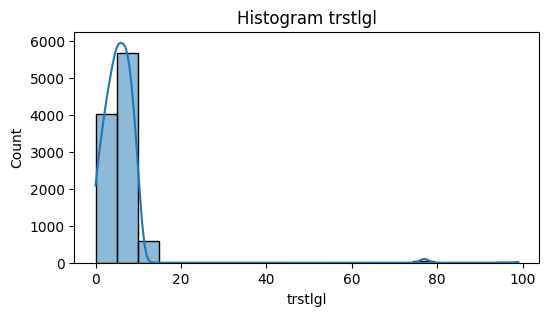

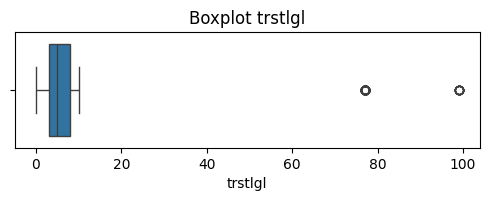

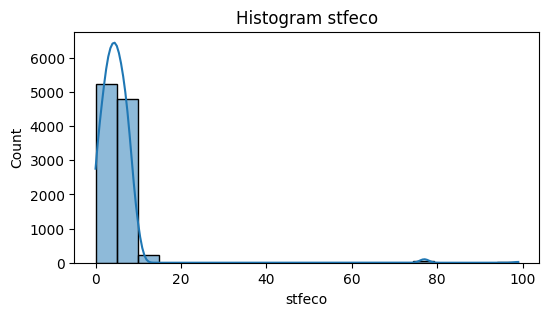

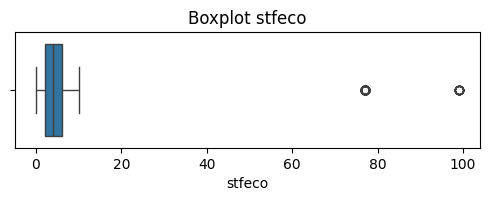

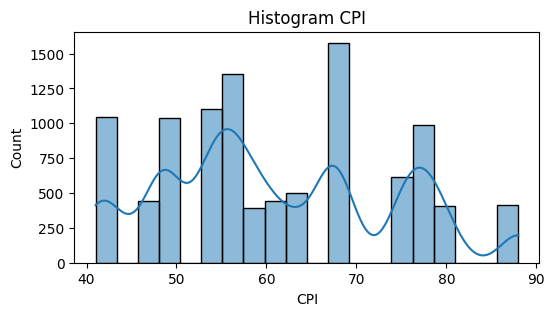

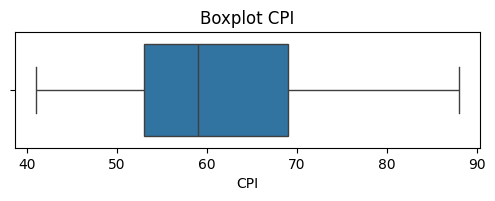

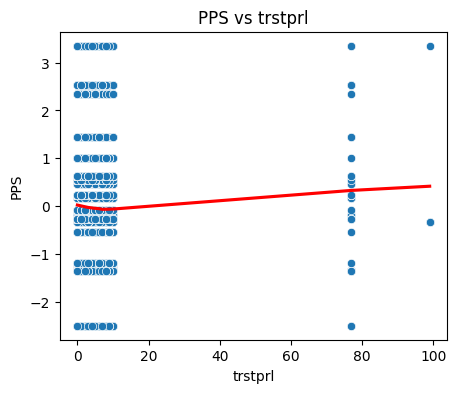

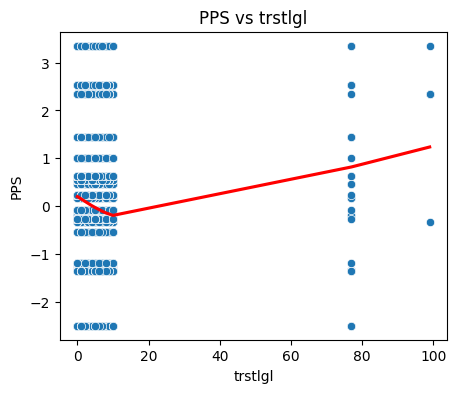

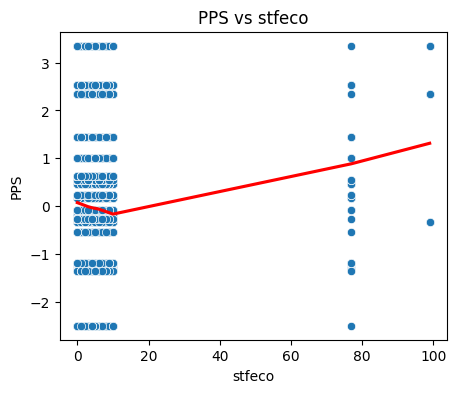

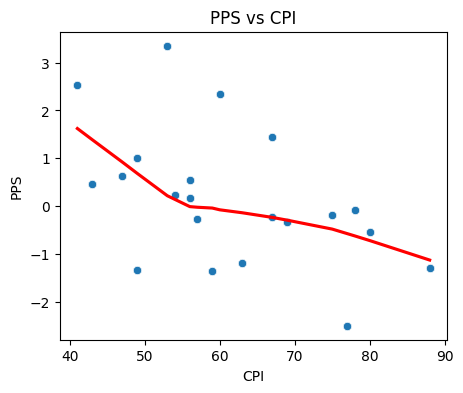

In [23]:
vars_to_plot = ["PPS","trstprl","trstlgl","stfeco","CPI"]

for v in vars_to_plot:
    plt.figure(figsize=(6,3))
    sns.histplot(df[v].dropna(), bins=20, kde=True)
    plt.title(f"Histogram {v}")
    plt.show()

    plt.figure(figsize=(6,1.5))
    sns.boxplot(x=df[v].dropna())
    plt.title(f"Boxplot {v}")
    plt.show()

# Scatterplots PPS vs predictors
for v in ["trstprl","trstlgl","stfeco","CPI"]:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[v], y=df["PPS"])
    sns.regplot(x=df[v], y=df["PPS"], scatter=False, lowess=True, line_kws={'color':'red'})
    plt.title(f"PPS vs {v}")
    plt.show()

          trstprl   trstlgl    stfeco       CPI
trstprl  1.000000  0.404044  0.175714  0.014096
trstlgl  0.404044  1.000000  0.102441  0.009507
stfeco   0.175714  0.102441  1.000000  0.007321
CPI      0.014096  0.009507  0.007321  1.000000


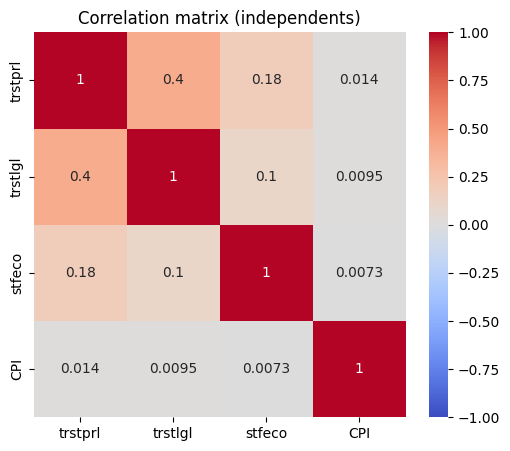

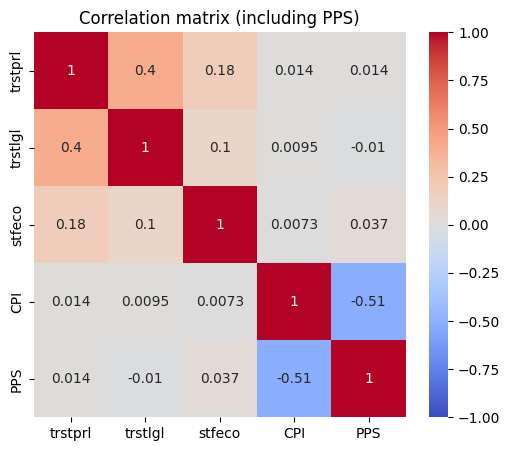

In [24]:
ind_vars = ["trstprl","trstlgl","stfeco","CPI"]
corr = df[ind_vars].corr()
print(corr)
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Correlation matrix (independents)")
plt.show()

# Include PPS
corr_all = df[ind_vars + ["PPS"]].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_all, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Correlation matrix (including PPS)")
plt.show()

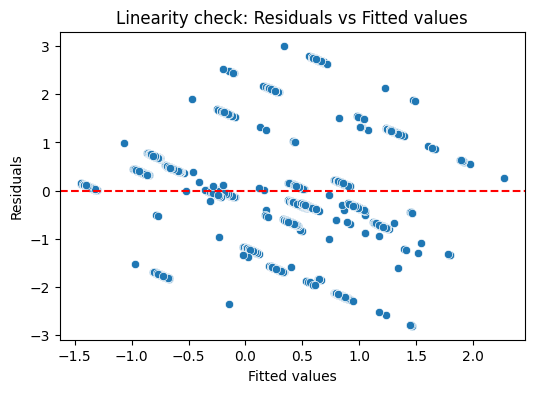

In [30]:
fitted = model_base.fittedvalues
resid = model_base.resid

plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=resid)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Linearity check: Residuals vs Fitted values")
plt.show()

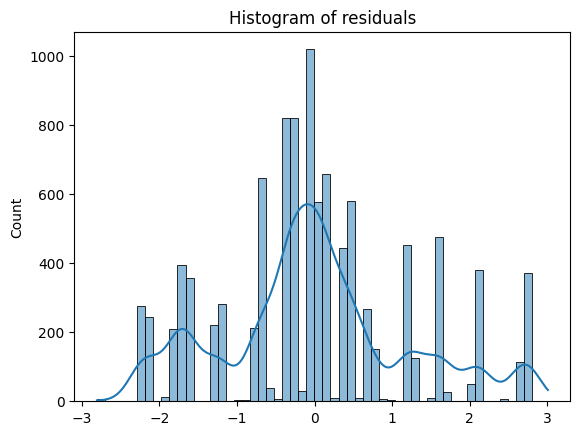

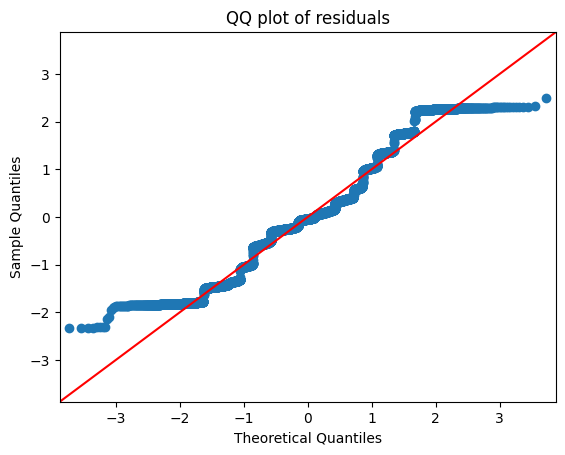

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10334.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9631401855114875), pvalue=np.float64(4.3110397938680196e-45))

In [31]:
import scipy.stats as stats

sns.histplot(resid, kde=True)
plt.title("Histogram of residuals")
plt.show()

sm.qqplot(resid, line='45', fit=True)
plt.title("QQ plot of residuals")
plt.show()

# Optional: statistical test (Shapiro-Wilk)
stats.shapiro(resid)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = model_base.model.exog  # includes const
vif = pd.DataFrame()
vif["Variable"] = model_base.model.exog_names
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif

,Variable,VIF
0,const,25.937584
1,trstprl,1.221857
2,trstlgl,1.196580
3,stfeco,1.033142
4,CPI,1.000239


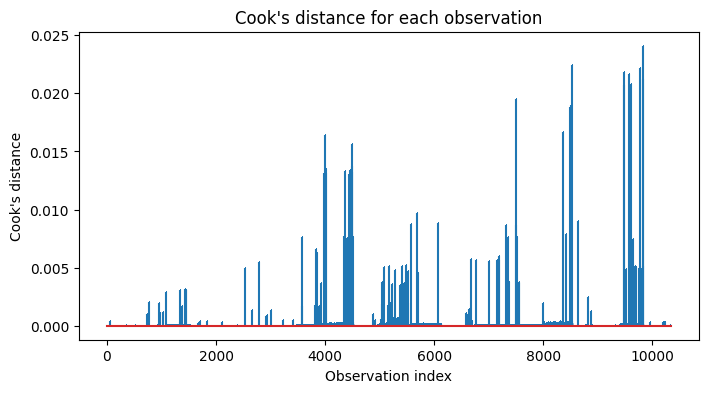

Number of large Cook's distances: 0


In [38]:
influence = model_base.get_influence()
cooks = influence.cooks_distance[0]

plt.figure(figsize=(8, 4))
plt.stem(range(len(cooks)), cooks, markerfmt=",")
plt.title("Cook's distance for each observation")
plt.xlabel("Observation index")
plt.ylabel("Cook's distance")
plt.show()

# Count how many Cook's distances are greater than 1 without numpy
large_count = sum(1 for c in cooks if c > 1)
print("Number of large Cook's distances:", large_count)

In [ ]:
# Key Results:
# - CPI had the strongest positive and significant relationship with pps.
# - Trust in parliament and trust in the legal system have weak or negative coefficients, suggesting that higher institutional trust reduces polarization
# - Economic satisfaction appears negatively related but not strongly statistically significant in the models

In [ ]:
# Limitations:
# ESS based on surveys and perceptions, may contain biases
# Not all EU states included

In [39]:
# Further research:
# Chronological data between eg) 2004 - 2024 to show to development of political polarization?
# Also potentially more indetail case studies, eg) with Greece and Poland